In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

In [15]:
(X_train,Y_train) , (X_test,Y_test) = keras.datasets.mnist.load_data()

In [16]:
X_train.shape

(60000, 28, 28)

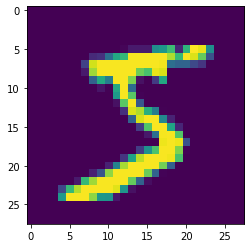

In [17]:
plt.imshow(X_train[0])

In [18]:
Y_train[0]

5

AttributeError: 'numpy.ndarray' object has no attribute 'target'

In [19]:
Y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [21]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [22]:
X_train_scale = X_train/255.0
X_test_scale = X_test/255.0

In [23]:
X_valid, X_train_new = X_train_scale[:3000] , X_train_scale[3000:]
Y_valid , Y_train_new = Y_train[:3000] , Y_train[3000:]

In [24]:
np.random.seed(42)
tf.random.set_seed(42)

In [28]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(70,activation = 'relu'))
model.add(keras.layers.Dense(100,activation = 'relu'))
model.add(keras.layers.Dense(10 , activation = 'softmax'))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 70)                54950     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               7100      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 63,060
Trainable params: 63,060
Non-trainable params: 0
_________________________________________________________________


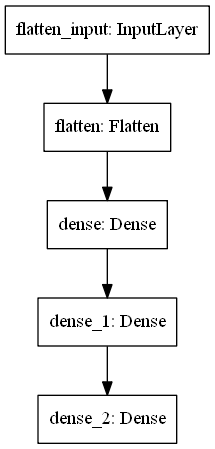

In [30]:
import pydot
keras.utils.plot_model(model)

In [31]:
weights , biases = model.layers[1].get_weights()
weights

array([[ 0.02758713, -0.0098896 , -0.02466272, ...,  0.02453594,
         0.07643487,  0.02800814],
       [-0.03226136, -0.02197389, -0.00882472, ..., -0.04392347,
         0.06875906,  0.06229308],
       [ 0.0401927 ,  0.00471257, -0.04534495, ..., -0.0139852 ,
         0.06506459, -0.07479737],
       ...,
       [ 0.06156334,  0.00087369,  0.07942959, ...,  0.04466868,
        -0.03555923,  0.0590209 ],
       [-0.05320104,  0.06853656,  0.07817226, ...,  0.05077078,
        -0.03528585,  0.03031917],
       [-0.00970193,  0.0086543 , -0.02569747, ..., -0.01319613,
        -0.06373063,  0.00094697]], dtype=float32)

In [32]:
weights.shape

(784, 70)

In [33]:
biases.shape

(70,)

In [35]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

In [40]:
model_history = model.fit(X_train_new , Y_train_new , epochs=20, validation_data = (X_valid, Y_valid))

Epoch 1/20
1782/1782 [==============================] - 5s 3ms/step - loss: 0.0110 - accuracy: 0.9986 - val_loss: 0.0912 - val_accuracy: 0.9783
Epoch 2/20
1782/1782 [==============================] - 5s 3ms/step - loss: 0.0106 - accuracy: 0.9987 - val_loss: 0.0918 - val_accuracy: 0.9780
Epoch 3/20
1782/1782 [==============================] - 5s 3ms/step - loss: 0.0102 - accuracy: 0.9988 - val_loss: 0.0924 - val_accuracy: 0.9773
Epoch 4/20
1782/1782 [==============================] - 5s 3ms/step - loss: 0.0099 - accuracy: 0.9990 - val_loss: 0.1198 - val_accuracy: 0.9717
Epoch 5/20
1782/1782 [==============================] - 5s 3ms/step - loss: 0.0096 - accuracy: 0.9990 - val_loss: 0.0918 - val_accuracy: 0.9760
Epoch 6/20
1782/1782 [==============================] - 5s 3ms/step - loss: 0.0093 - accuracy: 0.9990 - val_loss: 0.0947 - val_accuracy: 0.9767
Epoch 7/20
1782/1782 [==============================] - 5s 3ms/step - loss: 0.0088 - accuracy: 0.9992 - val_loss: 0.0929 - val_accuracy:

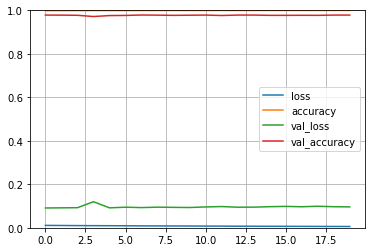

In [41]:
pd.DataFrame(model_history.history).plot(figsize = (6,4))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [42]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 26.3405 - accuracy: 0.9705


[26.34054946899414, 0.9704999923706055]

In [45]:
X_preview = X_test[:5]

In [46]:
Y_predict = model.predict_classes(X_preview)
Y_predict

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([7, 2, 1, 0, 4], dtype=int64)

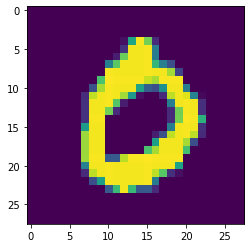

In [50]:
plt.imshow(X_preview[3])

In [1]:
a,b,c= 1,2.3,"Ayush"

In [2]:
a

1

In [3]:
b

2.3

In [4]:
c

'Ayush'

In [5]:
print("Sorry for not sharing screen that time")

Sorry for not sharing screen that time
